In [1]:
%ls

DATA MINING CUP 2017_features.pdf*  class.csv*
DATA MINING CUP 2017_task.pdf*      day_revenue.png
DMC.ipynb                           dmc_2017/
DMC_2017-DecisionTree.ipynb         fig-forest-feature-importances.png
DMC_2017-explore_data.ipynb         items.csv*
DMC_2017.ipynb                      itemsfill.csv
DMC_2017_task/                      train.csv*
DMC_2017_task_01.zip                tree.dot
DMC_NN.py                           tree.png
DMC_tensorflow.ipynb


In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('train.csv', sep = '|')
df_item = pd.read_csv('items.csv', sep = '|')

df_rawdata = pd.merge(df_train, df_item, how='inner', on=['pid'])
#df_rawdata.head()
#df_rawdata = df_rawdata.dropna()


In [4]:
print(df_rawdata.columns)

print(
    [cname for cname in df_rawdata.columns 
     if df_rawdata[df_rawdata.ix[:, cname].isnull() == True].shape[0] != 0])

Index(['lineID', 'day', 'pid', 'adFlag', 'availability', 'competitorPrice',
       'click', 'basket', 'order', 'price', 'revenue', 'manufacturer', 'group',
       'content', 'unit', 'pharmForm', 'genericProduct', 'salesIndex',
       'category', 'campaignIndex', 'rrp'],
      dtype='object')
['competitorPrice', 'pharmForm', 'category', 'campaignIndex']


In [5]:
df_train[df_train.ix[:, 'competitorPrice'].isnull() == True].groupby('competitorPrice').head()

,lineID,day,pid,adFlag,availability,competitorPrice,click,basket,order,price,revenue
14,15,1,21983,0,1,NaN,0,0,1,54.95,54.95
63,64,1,19317,0,1,NaN,0,1,0,3.82,0.00
64,65,1,9482,0,1,NaN,1,0,0,3.34,0.00
82,83,1,19949,0,2,NaN,1,0,0,14.19,0.00
99,100,1,4232,0,1,NaN,0,1,0,7.65,0.00


In [6]:
from matplotlib import pyplot as plt
from matplotlib import cm as cm

def plot_covariance_matrix(data):
    plt.close()
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('Blues', 30)
    cax = ax1.imshow(data.corr(), interpolation="nearest", cmap=cmap)
    #ax1.grid(True)
    plt.title('Feature Correlation')
    labels = list(data.columns)
    print(labels)
    ax1.set_xticks([i for i in range(len(labels))])
    ax1.set_yticks([i for i in range(len(labels))])
    ax1.set_xticklabels(labels, rotation=90)
    ax1.set_yticklabels(labels)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()


In [7]:
df_train.corr()['competitorPrice'].sort_values()


order             -0.076286
basket            -0.049298
adFlag             0.009946
lineID             0.022622
day                0.023958
availability       0.036423
pid                0.096790
click              0.105058
revenue            0.220593
price              0.954357
competitorPrice    1.000000
Name: competitorPrice, dtype: float64

In [8]:
for i in range(len(set(df_train.pid))):
    ss = set(df_train.ix[:, [ 'pid', 'competitorPrice', 'click', 'price', 'revenue']] \
        .groupby('pid') \
        .get_group(i+1)['competitorPrice'] \
        .isnull() \
        .values)
    print(i+1, ss)
    #if True in ss :
    #    print("haha")
    if i > 10:
        break


1 {False}
2 {True}
3 {True}
4 {False}
5 {False}
6 {False}
7 {False}
8 {False, True}
9 {False}
10 {False}
11 {False}
12 {False}


In [9]:
df_train.ix[:, [ 'pid', 'competitorPrice', 'click', 'price', 'revenue']] \
        .groupby('pid') \
        .get_group(8)['competitorPrice']
df_train[df_train.pid == 8][['pid', 'competitorPrice', 'click', 'price', 'revenue']] 

,pid,competitorPrice,click,price,revenue
5744,8,NaN,1,10.08,0.00
84015,8,8.71,0,10.08,0.00
84288,8,8.71,0,10.08,10.08
84297,8,8.71,1,10.08,0.00
93776,8,8.71,1,9.93,0.00
199843,8,8.71,1,10.08,0.00
234137,8,8.71,1,10.08,0.00
322567,8,8.71,1,10.08,0.00
349493,8,8.68,1,10.08,0.00
392640,8,8.68,0,10.08,0.00


['lineID', 'day', 'pid', 'adFlag', 'availability', 'competitorPrice', 'click', 'basket', 'order', 'price', 'revenue']


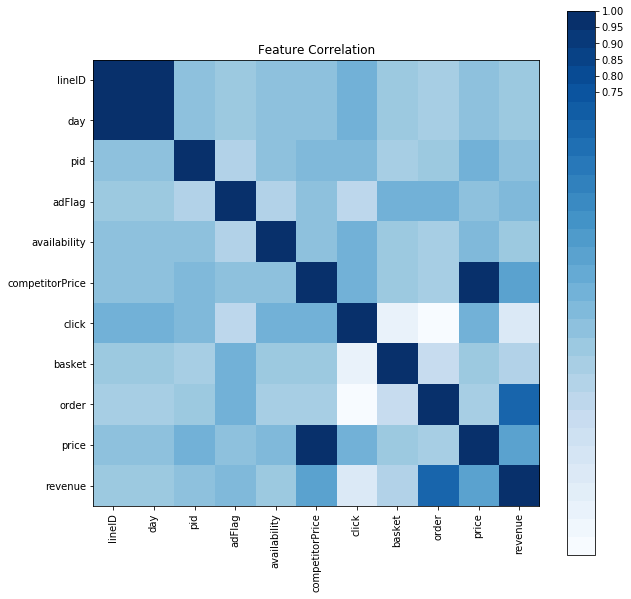

In [10]:
plot_covariance_matrix(df_train)

['pid', 'manufacturer', 'group', 'content', 'unit', 'pharmForm', 'genericProduct', 'salesIndex', 'category', 'campaignIndex', 'rrp']


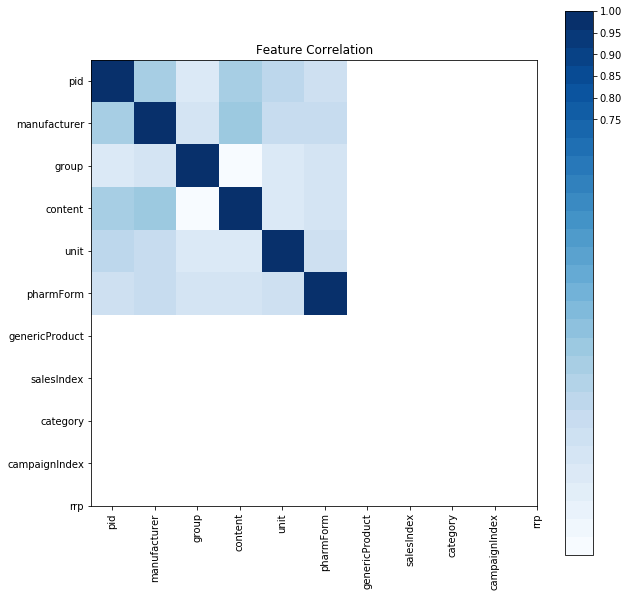

In [11]:
plot_covariance_matrix(df_item)

In [12]:
df_item.groupby('manufacturer').get_group(1)

#df_item[df_item.pid == 8][['pid', 'competitorPrice', 'click', 'price', 'revenue']] 

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,rrp
0,1,1,2FOI,80,ST,TAB,0,40,NaN,NaN,10.89
1,2,1,2FOI,80,ST,Tab,0,40,NaN,NaN,10.89
2,3,1,2FOI,10,G,GLO,0,40,NaN,NaN,16.45
3,4,1,2FOI,80,ST,TAB,0,40,NaN,NaN,10.89
5,6,1,2FOI,10,G,GLO,0,40,2.0,NaN,9.85
7,8,1,2FOI,80,ST,TAB,0,40,2.0,NaN,10.89
8,9,1,2FOI,10,G,GLO,0,40,NaN,NaN,9.85
517,518,1,2FOI,20,ML,DSS,0,40,133.0,NaN,6.60
518,519,1,2FOI,50,ML,DIL,0,40,133.0,NaN,13.20
680,681,1,2FOI,200,ST,TAB,0,40,133.0,NaN,13.20


In [13]:
df_item.groupby('manufacturer').get_group(3)


,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,rrp
6,7,3,21OKG,15,ST,TRA,0,53,3.0,NaN,21.45
466,467,3,1DOIF0ZO,60X0.3,ML,EDP,0,53,39.0,NaN,29.65
856,857,3,1DOIF0ZO,20X0.3,ML,EDP,0,53,39.0,NaN,10.95
2477,2478,3,1DOIF0ZO,60X0.3,ML,EDP,0,53,39.0,NaN,29.65
6405,6406,3,13OZ0F,50,ML,GEL,0,53,137.0,NaN,18.95
6406,6407,3,13OK0F,30,ML,CRE,0,53,39.0,NaN,24.96
6642,6643,3,1DOIF0ZO,20X0.45,ML,EDP,0,53,39.0,NaN,14.25
6649,6650,3,1DOIF0ZO,60X0.45,ML,EDP,0,53,39.0,NaN,35.74
6650,6651,3,1DOIF0ZO,15,ML,ATR,0,53,39.0,NaN,8.58
10046,10047,3,21OK3,100,ST,KAP,0,53,NaN,NaN,27.39


In [14]:
df_item.groupby('manufacturer').get_group(2)


,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,rrp
4,5,2,10OJ03JS,8,ST,PUL,0,40,1.0,NaN,22.53
15,16,2,10OJ03JS,8,ST,PUL,0,40,1.0,NaN,22.53
3986,3987,2,10OJ03IS,10,ST,PUL,0,40,73.0,NaN,9.11
3987,3988,2,10OJ03IS,50,ST,PUL,0,40,73.0,NaN,36.63
7437,7438,2,10OJ02OI,20,ST,GRA,0,40,73.0,NaN,7.79
7438,7439,2,10OJ02OI,100,ST,GRA,0,40,73.0,NaN,31.02
11006,11007,2,10OJ02OI,150,G,GRA,0,40,73.0,NaN,9.92
11113,11114,2,10OJ02OI,150,G,GRA,0,40,73.0,NaN,9.92
11478,11479,2,10OJ02OI,20,ST,GRA,0,40,73.0,NaN,7.79
11479,11480,2,10OJ02OI,100,ST,GRA,0,40,73.0,NaN,31.02
